In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, LSTM, Flatten, InputLayer, Conv1D, MaxPooling1D, GRU, Convolution2D
from keras.layers import Dropout, BatchNormalization, Bidirectional
from sklearn.model_selection import train_test_split  
from tensorflow.keras.utils import plot_model,to_categorical
import time

import pandas as pd  
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint

import random as rn
import tensorflow as tf

In [2]:
X = np.load("X_lld_jpt.npy")
# X = X.reshape((X.shape[0], 1, X.shape[1]))
y = np.load("y_lld_jpt.npy")
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [3]:
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(2658, 12, 193) (665, 12, 193)
(2658,) (665,)


In [15]:
def create_model():  
    model = Sequential()
    model.add(BatchNormalization(axis=-1, input_shape=(train_x.shape[1],train_x.shape[2]))) 
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(256, return_sequences=True))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
              
    # model compilation
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])  
    return model

In [7]:
checkpoint = ModelCheckpoint("model_coswara_lstm_lld_baseline.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

In [16]:
start_time = time.time()
model = create_model()
model.summary()
hist = model.fit(train_x, train_y, epochs=100,steps_per_epoch=25, validation_split=0.2)  

time_total = time.time() - start_time

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 12, 193)           772       
_________________________________________________________________
lstm_9 (LSTM)                (None, 12, 64)            66048     
_________________________________________________________________
lstm_10 (LSTM)               (None, 12, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 12, 256)           394240    
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

KeyboardInterrupt: 

Time training: 4 menit 3 detik
Accuracy: 80.60%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


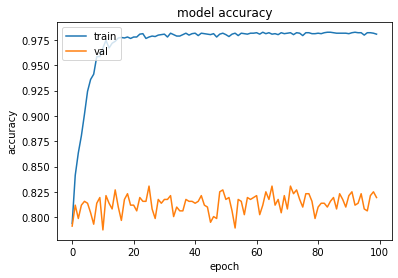

In [16]:
import math
menit = math.floor(time_total/60)
detik = math.floor(time_total - (menit*60))
print("Time training: %s menit %s detik" % (menit, detik))
# Final evaluation of the model
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

print(hist.history.keys())
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

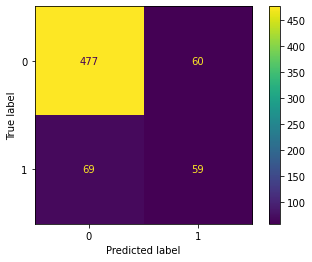

In [18]:
y_pred = model.predict(test_x)
for i in range(0,len(y_pred)) :
    selisih_to_0 = abs(0-y_pred[i][0])
    selisih_to_1 = abs(1-y_pred[i][0])
    if(min(selisih_to_0, selisih_to_1) == selisih_to_0):
        y_pred[i][0] = 0
    else:
        y_pred[i][0] = 1
cm = confusion_matrix(test_y, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [19]:
tp, tn = cm[0, 0], cm[1, 1]
fn, fp = cm[1, 0], cm[0, 1]
    
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
    
uar = (specificity + sensitivity)/2.0
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(sensitivity)
print(specificity)
print(uar)
print(accuracy)

0.8736263736263736
0.4957983193277311
0.6847123464770524
0.806015037593985
